In [33]:
import Tickers 
import pandas as pd
import hvplot.pandas
import numpy as np 

In [135]:
Tickers.readAllPriceCsv()
df = Tickers.tickerPriceInfo['AAPL']
df.set_index('Date')
#df.index = pd.to_datetime(df['Date'],format='%Y-%m-%d')
#df = df.groupby(by=[df.index.month, df.index.year])
df['YearMonth'] = pd.to_datetime(df['Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
df['Year'] = pd.to_datetime(df['Date']).apply(lambda x: '{year}'.format(year=x.year))
df['Month'] = pd.to_datetime(df['Date']).apply(lambda x: '{month}'.format(month=x.month))
df.head

<bound method NDFrame.head of            Date        Open        High         Low       Close   Adj Close  \
0    2020-07-27   93.709999   94.904999   93.480003   94.809998   93.640457   
1    2020-07-28   94.367500   94.550003   93.247498   93.252502   92.102150   
2    2020-07-29   93.750000   95.230003   93.712502   95.040001   93.867607   
3    2020-07-30   94.187500   96.297501   93.767502   96.190002   95.003426   
4    2020-07-31  102.885002  106.415001  100.824997  106.260002  104.949219   
..          ...         ...         ...         ...         ...         ...   
497  2022-07-18  150.740005  151.570007  146.699997  147.070007  147.070007   
498  2022-07-19  147.919998  151.229996  146.910004  151.000000  151.000000   
499  2022-07-20  151.119995  153.720001  150.369995  153.039993  153.039993   
500  2022-07-21  154.500000  155.570007  151.940002  155.350006  155.350006   
501  2022-07-22  155.389999  156.279999  153.410004  154.089996  154.089996   

        Volume YearMo

In [50]:
df = df.replace(r'^\s*$', np.nan, regex=True)
print(df.size)

4518


In [67]:
df.dropna(inplace=True)
print(df.size)

In [136]:
t = df.groupby(['Year', 'Date'])['Volume'].mean().sort_values()
t.head()

Year  Date      
2021  2021-11-11    41000000.0
      2021-08-05    46397700.0
2020  2020-11-27    46691300.0
2021  2021-08-11    48493500.0
      2021-08-26    48597200.0
Name: Volume, dtype: float64

In [142]:
t.hvplot.barh(x='Date', y='Volume', by='Year', width=1000, height=500) 

:Bars   [Date,Year]   (Volume)

In [188]:
t.hvplot.line(y='Date', x='Volume', by='Year', width=1000, height=500)

def get_volume_line_plot(volume_mean_df):
    plt = volume_mean_df.hvplot.line(y='Date', x='Volume', by='Year', width=1000, height=500)
    return plt

:NdOverlay   [Year]
   :Curve   [Volume]   (Date)

In [201]:
df.hvplot(y='YearMonth', x='Close', by='Year', width=1000, height=500)

:NdOverlay   [Year]
   :Curve   [Close]   (YearMonth)

In [190]:
df.hvplot.barh(x='Date', y='Volume', groupby='YearMonth', width=1000, height=500) 

:DynamicMap   [YearMonth]
   :Bars   [Date]   (Volume)

In [192]:
colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#00ec8b'}
config_ticks = {'size': 14, 'color': colors['grey'], 'labelcolor': colors['grey']}
config_title = {'size': 18, 'color': colors['grey'], 'ha': 'left', 'va': 'baseline'}
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/usr/local/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [288]:
def get_charts(stock_data):
    plt.rc('figure', figsize=(15, 10))
    
    fig, axes = plt.subplots(2, 1, 
                gridspec_kw={'height_ratios': [2, 1]})
    fig.tight_layout(pad=3)
    
    date = stock_data['YearMonth']
    close = stock_data['Close']
    vol = stock_data['Volume']
    adjclose = stock_data['Adj Close']
    
    plot_price = axes[0]
    plot_price.plot(date, close, color=colors['blue'], 
    linewidth=1, label='Price')
    plot_price.yaxis.tick_right()
    plot_price.tick_params(axis='both', **config_ticks)
    plot_price.set_ylabel('Price (in USD)', fontsize=14)
    plot_price.yaxis.set_label_position("right")
    plot_price.yaxis.label.set_color(colors['grey'])
    plot_price.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
    plot_price.set_axisbelow(True)
    
    plot_vol = axes[1]
    plot_vol.bar(date, vol, width=1, color='green')
    plot_vol.yaxis.tick_right()
    plot_vol.tick_params(axis='both', **config_ticks)
    plot_vol.set_ylabel('Volume (in Millions)', fontsize=14)
    plot_vol.yaxis.set_label_position("right")
    plot_vol.yaxis.label.set_color(colors['grey'])
    plot_vol.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
    plot_vol.set_axisbelow(True)

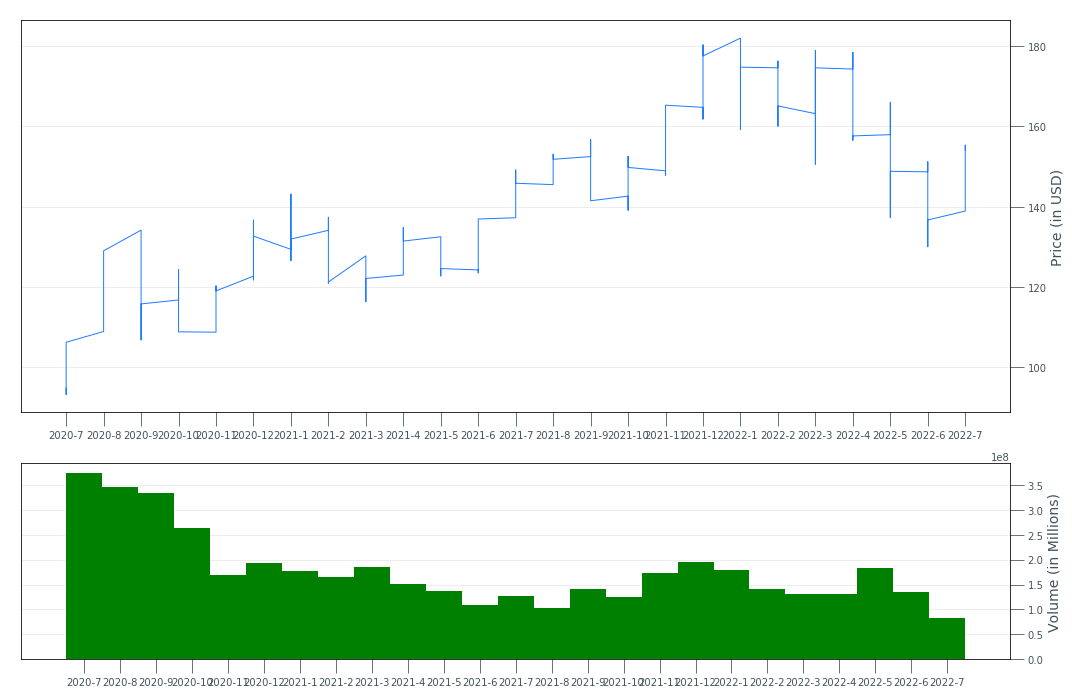

In [289]:
get_charts(df)

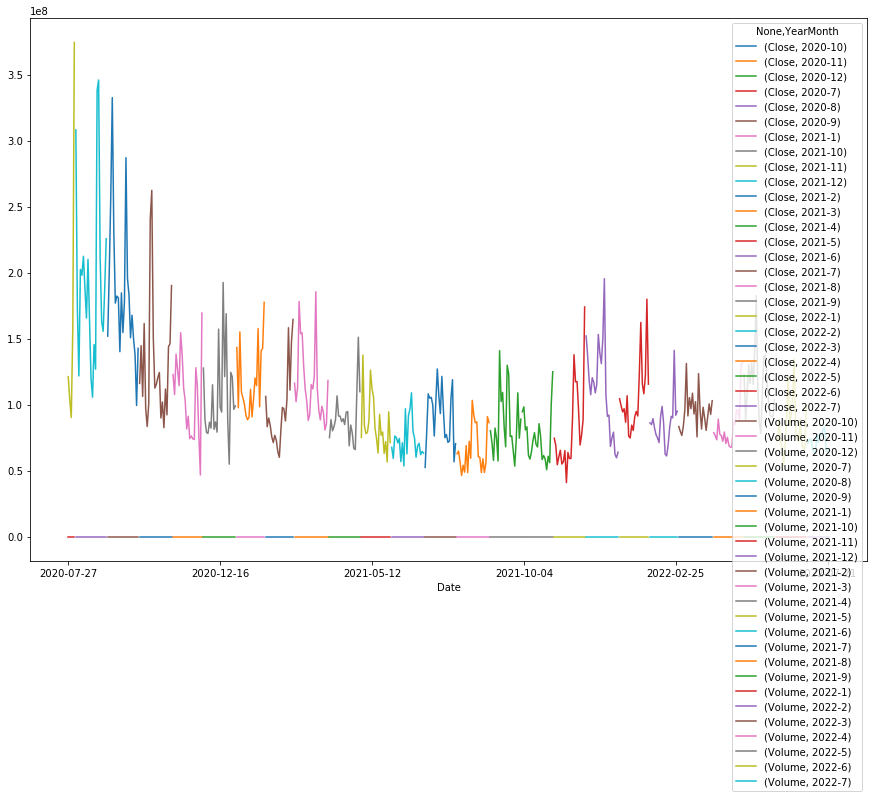

In [228]:
test = df.pivot(index='Date', columns='YearMonth', values=['Close','Volume'])
test.plot()

In [1]:
import holoviews as hv
df3 = pd.DataFrame({
    'x': df['Date'], 
    'y': df['Volume'],
})

df4 = pd.DataFrame({
    'x': df['Date'], 
    'y': df['Close'],
})

# set axiswise=True so that every plot gets its own independent x- and y-axis    
plot1 = hv.Scatter(df3).opts(axiswise=True)
plot2 = hv.Scatter(df4).opts(axiswise=True)

plot1 * plot2

NameError: name 'pd' is not defined

In [ ]:
import bokeh.plotting as bkp
from bokeh.models import Range1d, LinearAxis


#const Range1d = Bokeh.Models('Range1d')
xdr = Range1d(start= min(df['Close']), end= max(df['Close']))
print(xdr)

In [ ]:
def apply_formatter(plot, element):
    p = plot.state
    # create secondary range and axis
    p.extra_y_ranges = {"twiny":xdr }
    p.add_layout(LinearAxis(y_range_name="twiny"), 'right')

  

In [ ]:
a = df.hvplot(x='Date', groupby='Year', width=1000, height=400) 
b = df.hvplot(x='Date', groupby='Year', width=1000, height=400).opts(hooks=[apply_formatter])

a*b